<a href="https://colab.research.google.com/github/Gops03/TEORIA_DE_SE-ALES/blob/main/CONSTELACIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas necesarias
from google.colab import drive
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Montar Google Drive
drive.mount('/content/drive')

# Definir la ruta al archivo
path = '/content/drive/My Drive/TDS/RML2016.10a_dict.dat'

# Cargar la base de datos
with open(path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')

# Verificar el tipo de datos cargados
print(f"Tipo de datos: {type(data)}")
print(f"Claves del diccionario: {list(data.keys())[:]}")  # Mostrar solo las primeras 5 claves para evitar mucha salida

# Verificar el formato de las señales
for key in list(data.keys())[:2]:  # Mostrar solo los primeros 2 ejemplos
    print(f"Clave: {key}")
    for signal in data[key][:2]:  # Mostrar las primeras 2 señales por clave
        print(f"Formato de la señal: {signal.shape}")
        print(f"Datos de la señal: {signal[:5]}")  # Mostrar los primeros 5 datos de la señal



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tipo de datos: <class 'dict'>
Claves del diccionario: [('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('AM-SSB', 12), ('8PSK', 8), ('8PSK', 12), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('PAM4', -6), ('WBFM', -18), ('AM-DSB', 16), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('AM-SSB', 6), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('AM-SSB', -12), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('BPSK', -10), ('QPSK', 8), ('PAM4', 14), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('WBFM', -4), ('AM-SSB', -18), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('8PSK', -8), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('AM-SSB', 8), ('GFSK', 18), ('QAM16', 6)

Dimensiones del array de señales: (220000, 2, 128)


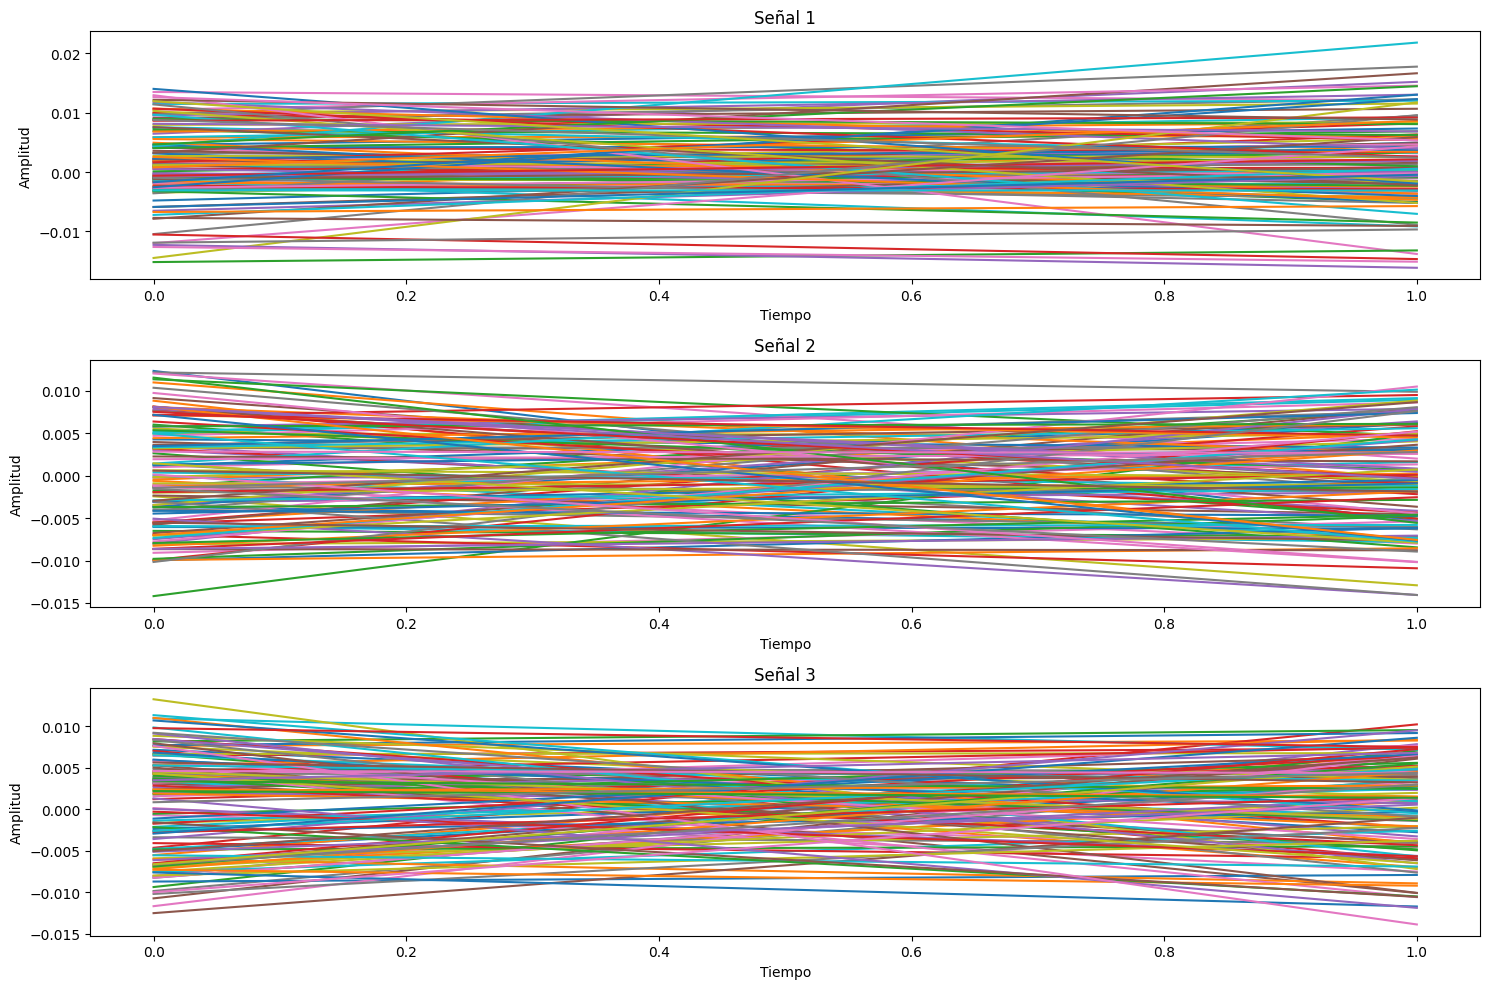

In [ ]:
# Inicializar una lista para almacenar las señales
signals_list = []

# Recorrer las claves del diccionario y almacenar las señales
for key, signals in data.items():
    for signal in signals:
        signals_list.append(signal)

# Convertir la lista de señales en un array numpy
signals_array = np.array(signals_list)

# Verificar las dimensiones del array
print(f"Dimensiones del array de señales: {signals_array.shape}")

# Asegurarse de que el array tiene al menos 3 señales para graficar
if signals_array.shape[0] >= 3:
    # Ejemplo de cómo visualizar varias señales
    plt.figure(figsize=(15, 10))
    for i in range(3):
        plt.subplot(3, 1, i + 1)
        plt.plot(signals_array[i])
        plt.title(f'Señal {i+1}')
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')

    plt.tight_layout()
    plt.show()
else:
    print("El array de señales no tiene suficientes señales para graficar.")


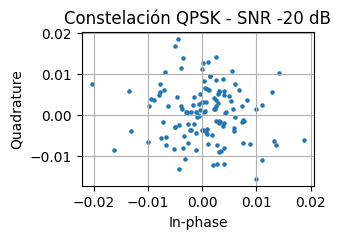

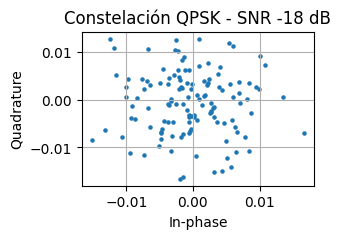

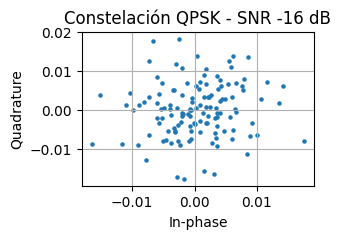

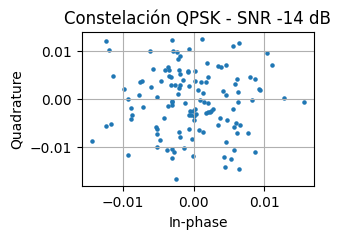

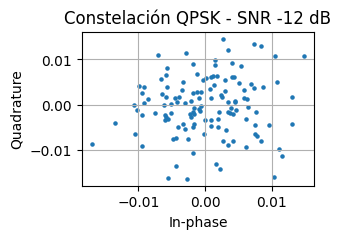

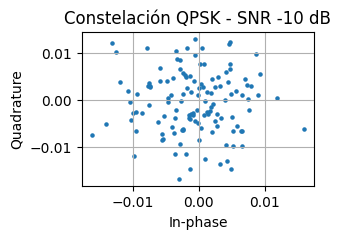

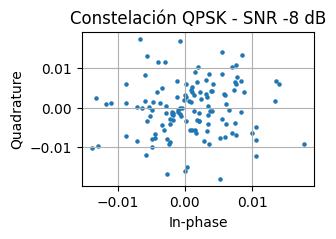

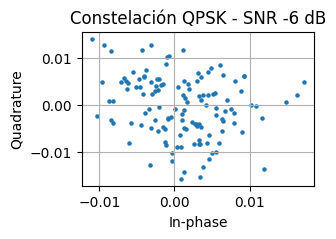

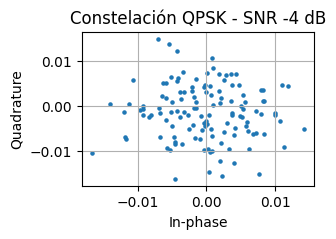

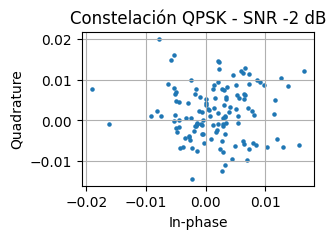

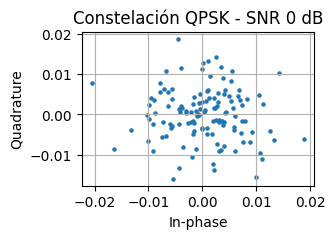

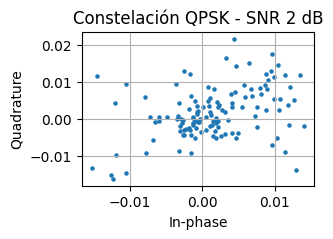

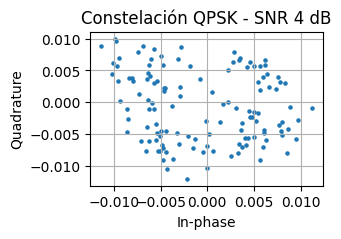

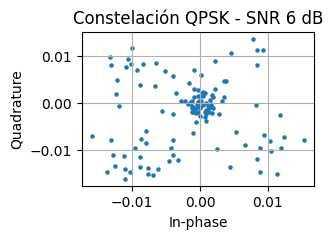

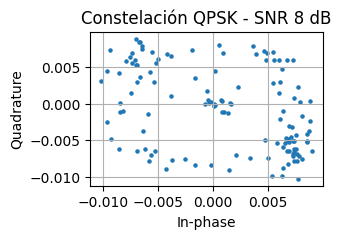

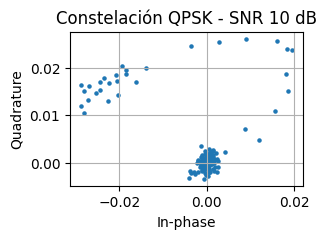

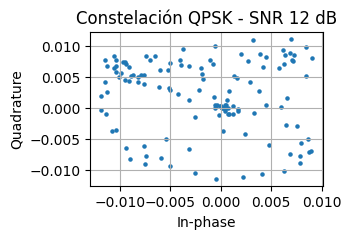

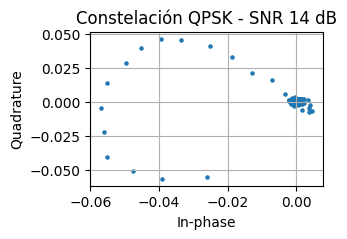

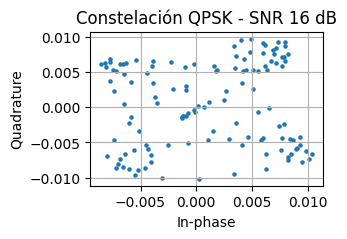

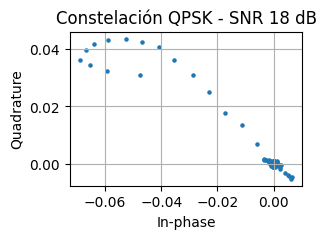

In [ ]:
import matplotlib.pyplot as plt

# Función para graficar la constelación
def plot_constellation(signal, title):
    plt.figure(figsize=(3, 2))  # Ajustar el tamaño de la figura
    plt.scatter(signal.real, signal.imag, s=5)  # Aumentar el tamaño de los puntos
    plt.title(title)
    plt.xlabel('In-phase')
    plt.ylabel('Quadrature')
    plt.grid(True)
    plt.show()

# Definir un conjunto para almacenar los SNR ya vistos
snr_seen = set()

# Crear una lista para almacenar SNRs válidos
valid_snr = list(range(-20, 20, 2))

# Recorrer las claves del diccionario en el orden definido
for snr_db in valid_snr:
    for key, signals in data.items():
        # Verificar si la clave es de tipo QPSK y coincide con el SNR
        if key[0] == 'QPSK' and key[1] == snr_db:
            # Verificar si ya se ha graficado este SNR
            if snr_db not in snr_seen:
                snr_seen.add(snr_db)

                for example_signal in signals:
                    # Convertir la señal a formato complejo (suponiendo que las señales son reales y están en pares [I, Q])
                    complex_signal = example_signal[0::2] + 1j * example_signal[1::2]

                    # Graficar la constelación
                    plot_constellation(complex_signal, f'Constelación QPSK - SNR {snr_db} dB')

                    # Salir del bucle después de graficar una señal por cada SNR
                    break


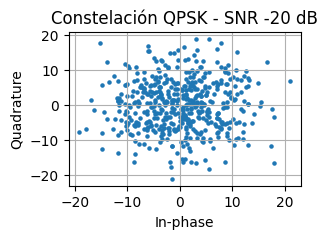

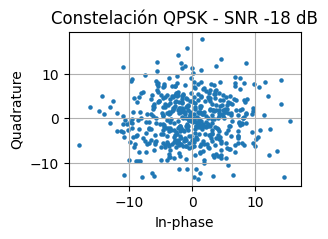

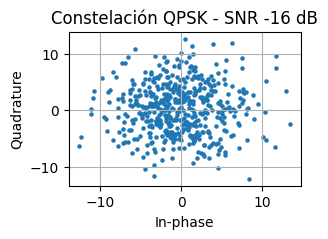

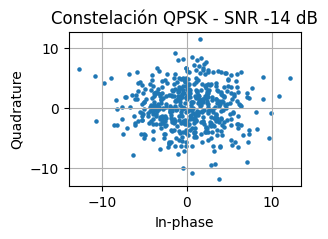

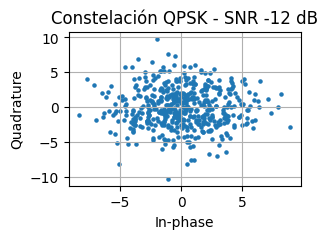

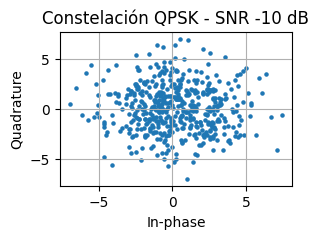

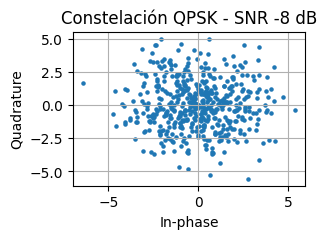

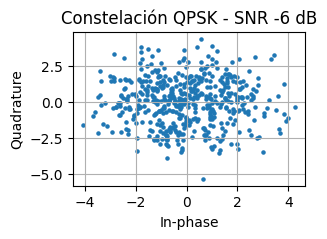

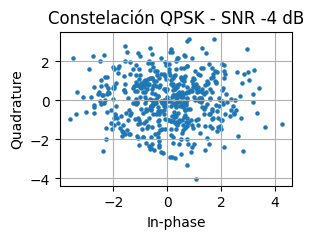

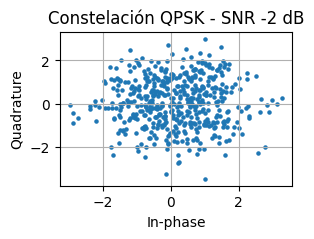

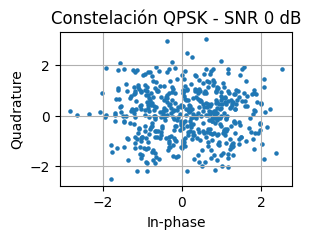

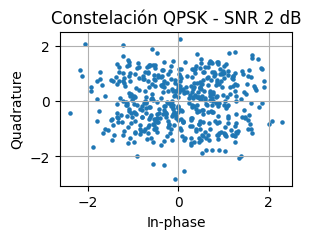

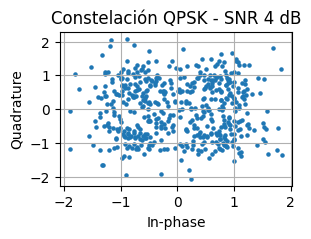

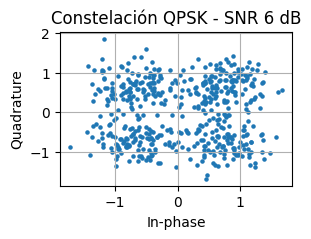

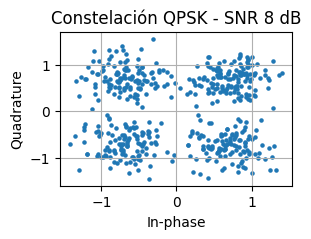

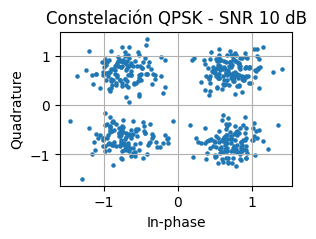

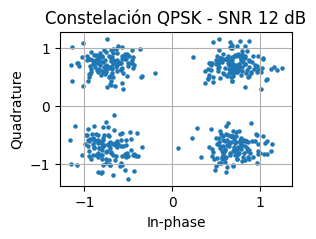

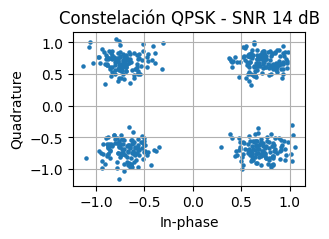

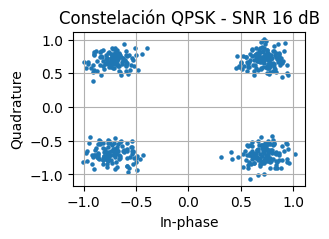

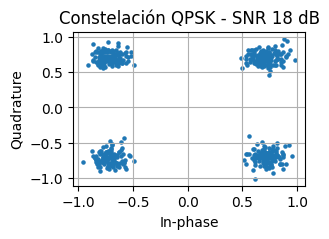

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar una secuencia aleatoria de bits
def generate_bits(num_bits):
    return np.random.randint(0, 2, num_bits)

# Función para mapear bits a símbolos QPSK
def qpsk_modulate(bits):
    symbols = (2 * bits[0::2] - 1) + 1j * (2 * bits[1::2] - 1)  # Mapeo a símbolos QPSK
    return symbols / np.sqrt(2)  # Normalizar la potencia

# Función para añadir ruido a la señal
def add_noise(signal, snr_db):
    snr_linear = 10**(snr_db / 10)
    power_signal = np.mean(np.abs(signal)**2)
    power_noise = power_signal / snr_linear
    noise = np.sqrt(power_noise / 2) * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    return signal + noise

# Función para generar una señal senoidal
def generate_sine_signal(freq, sample_rate, duration):
    t = np.arange(0, duration, 1/sample_rate)
    signal = np.exp(1j * 2 * np.pi * freq * t)
    return signal

# Función para graficar la constelación
def plot_constellation(signal, title):
    plt.figure(figsize=(3, 2))  # Ajustar el tamaño de la figura
    plt.scatter(signal.real, signal.imag, s=5)  # Aumentar el tamaño de los puntos
    plt.title(title)
    plt.xlabel('In-phase')
    plt.ylabel('Quadrature')
    plt.grid(True)
    plt.show()

# Parámetros de la señal QPSK
num_bits = 1000  # Número de bits para QPSK
valid_snr = list(range(-20, 20, 2))  # Lista de SNRs válidos

# Generar bits aleatorios para QPSK
bits = generate_bits(num_bits)

# Modulación QPSK
qpsk_signal = qpsk_modulate(bits)

# Definir un conjunto para almacenar los SNR ya vistos
snr_seen = set()

# Recorrer los niveles de SNR para la señal QPSK
for snr_db in valid_snr:
    # Añadir ruido a la señal QPSK
    noisy_signal = add_noise(qpsk_signal, snr_db)

    # Verificar si ya se ha graficado este SNR
    if snr_db not in snr_seen:
        snr_seen.add(snr_db)

        # Graficar la constelación de QPSK
        plot_constellation(noisy_signal, f'Constelación QPSK - SNR {snr_db} dB')

# Parámetros de la señal senoidal
freq = 1000  # Frecuencia de la señal senoidal en Hz
sample_rate = 10000  # Tasa de muestreo en Hz
duration = 1  # Duración de la señal senoidal en segundos

# Generar la señal senoidal
sine_signal = generate_sine_signal(freq, sample_rate, duration)

# Recorrer los niveles de SNR para la señal senoidal
for snr_db in valid_snr:
    # Añadir ruido a la señal senoidal
    noisy_signal_sine = add_noise(sine_signal, snr_db)

    # Verificar si ya se ha graficado este SNR
    if snr_db not in snr_seen:
        snr_seen.add(snr_db)

        # Graficar la constelación de la señal senoidal
        plot_constellation(noisy_signal_sine, f'Constelación Senoidal - SNR {snr_db} dB')


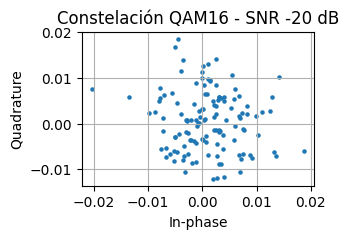

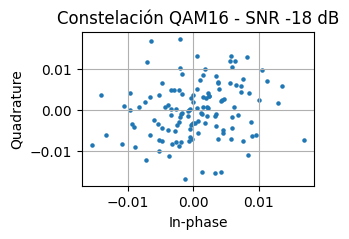

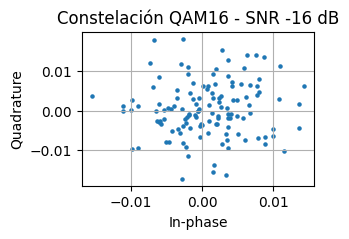

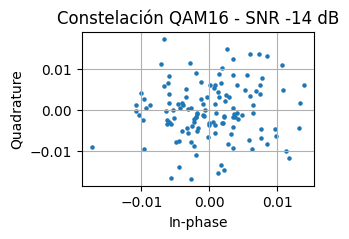

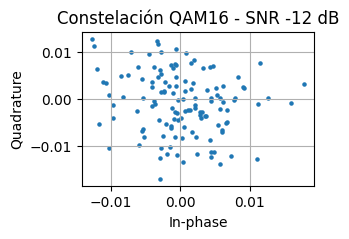

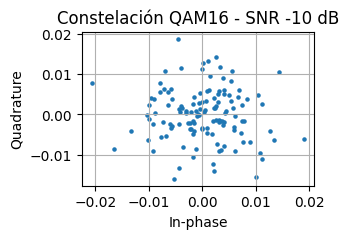

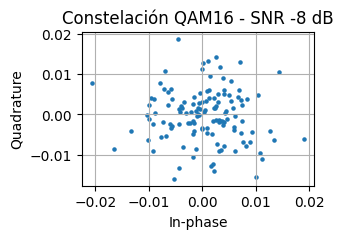

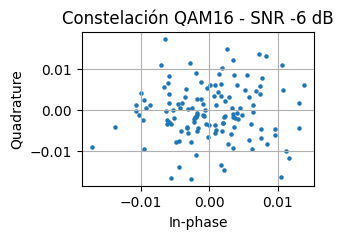

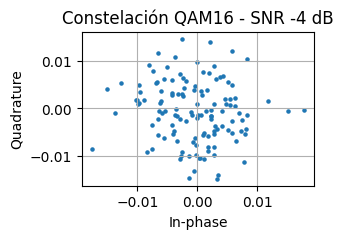

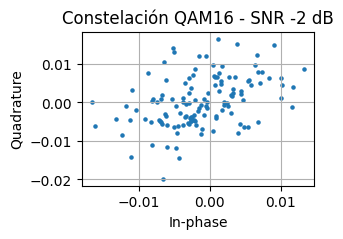

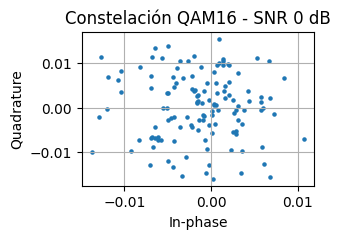

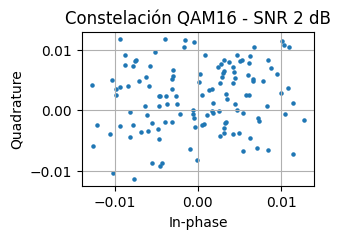

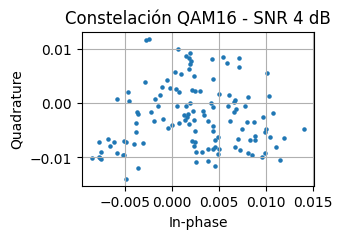

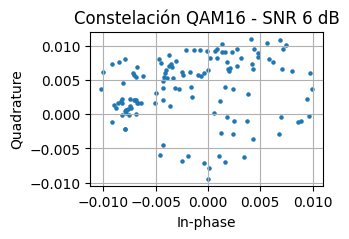

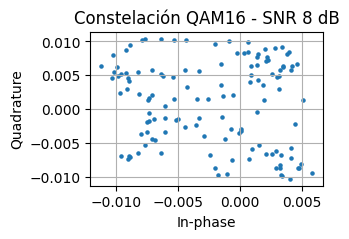

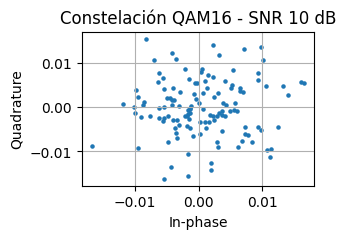

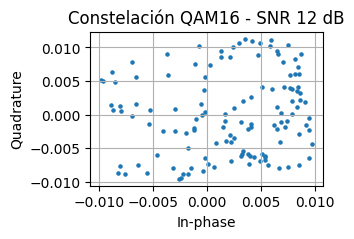

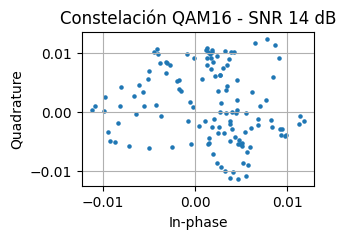

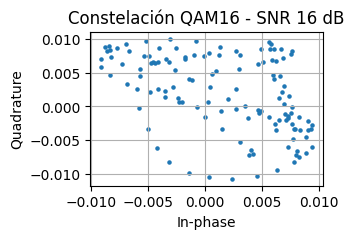

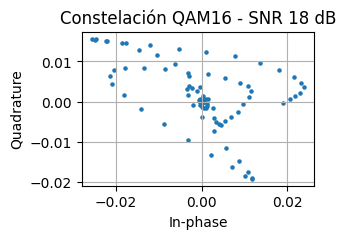

In [ ]:
# Definir un conjunto para almacenar los SNR ya vistos
snr_seen = set()

# Crear una lista para almacenar SNRs válidos
valid_snr = list(range(-20, 20, 2))

# Recorrer las claves del diccionario en el orden definido
for snr_db in valid_snr:
    for key, signals in data.items():
        # Verificar si la clave es de tipo QPSK y coincide con el SNR
        if key[0] == 'QAM16' and key[1] == snr_db:
            # Verificar si ya se ha graficado este SNR
            if snr_db not in snr_seen:
                snr_seen.add(snr_db)

                for example_signal in signals:
                    # Convertir la señal a formato complejo (suponiendo que las señales son reales y están en pares [I, Q])
                    complex_signal = example_signal[0::2] + 1j * example_signal[1::2]

                    # Graficar la constelación
                    plot_constellation(complex_signal, f'Constelación QAM16 - SNR {snr_db} dB')

                    # Salir del bucle después de graficar una señal por cada SNR
                    break

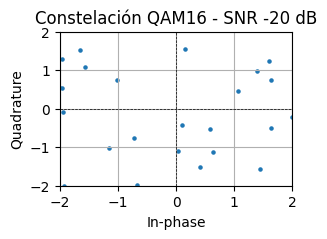

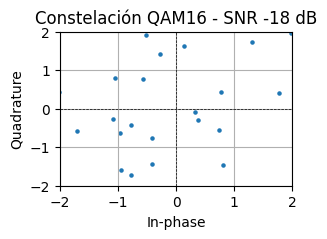

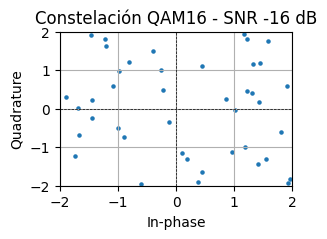

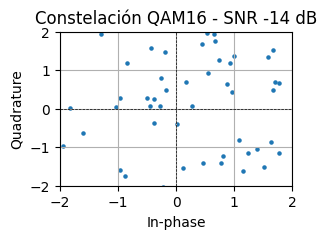

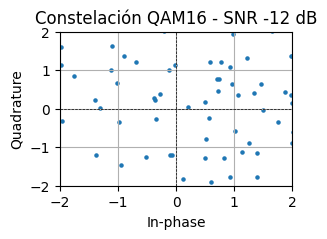

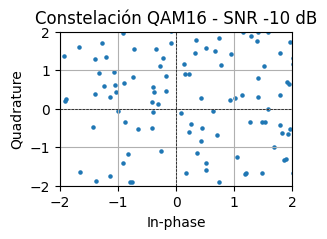

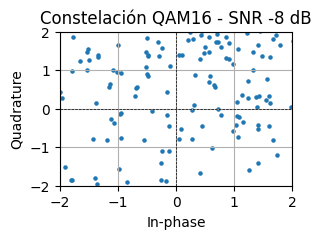

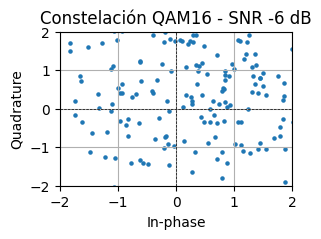

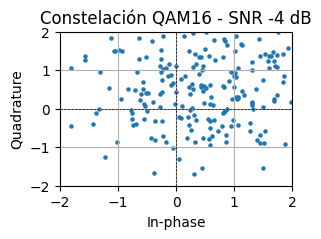

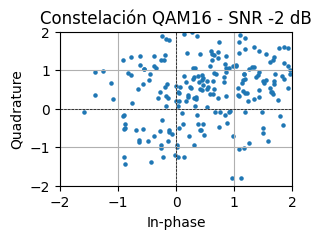

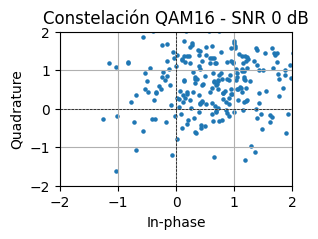

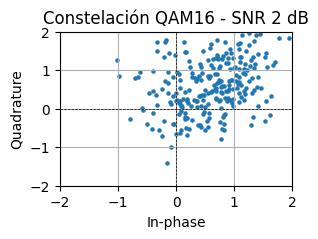

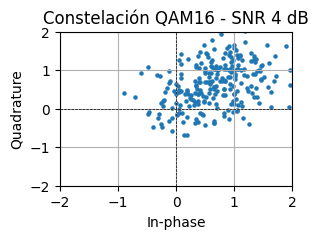

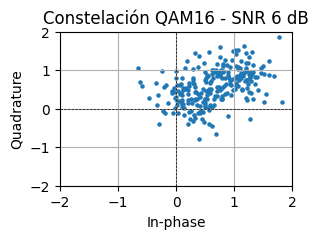

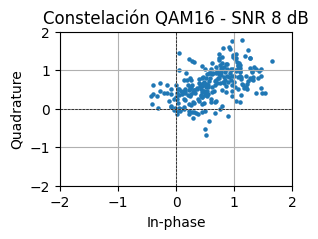

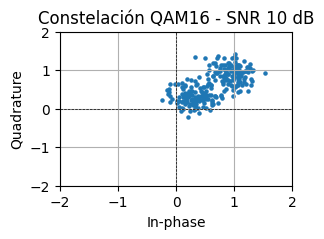

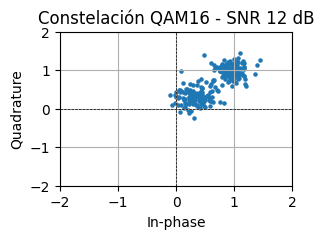

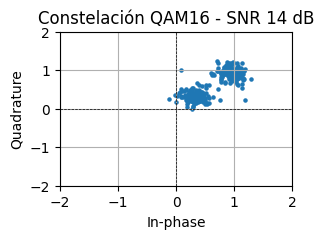

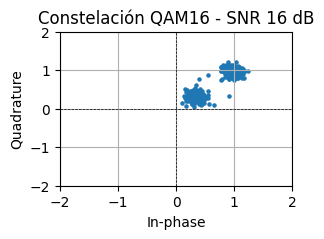

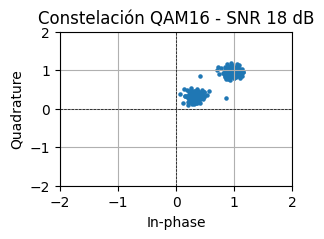

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar una onda senoidal
def generate_sine_wave(freq, duration, sample_rate):
    t = np.arange(0, duration, 1/sample_rate)
    return np.sin(2 * np.pi * freq * t)

# Función para mapear bits a símbolos QAM16
def qam16_modulate(bits):
    if len(bits) % 4 != 0:
        bits = bits[:-(len(bits) % 4)]

    symbols = []
    for i in range(0, len(bits), 4):
        b0, b1, b2, b3 = bits[i:i+4]
        symbol = (2*b0 + 1) + 1j*(2*b1 + 1)  # Mapeo a los 16 puntos de QAM
        symbols.append(symbol)
    return np.array(symbols) / np.sqrt(10)  # Normalizar la potencia

# Función para añadir ruido a la señal
def add_noise(signal, snr_db):
    snr_linear = 10**(snr_db / 10)
    power_signal = np.mean(np.abs(signal)**2)
    power_noise = power_signal / snr_linear
    noise = np.sqrt(power_noise / 2) * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    return signal + noise

# Función para graficar la constelación
def plot_constellation(signal, title):
    plt.figure(figsize=(3, 2))  # Ajustar el tamaño de la figura
    plt.scatter(signal.real, signal.imag, s=5)  # Aumentar el tamaño de los puntos
    plt.title(title)
    plt.xlabel('In-phase')
    plt.ylabel('Quadrature')
    plt.grid(True)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.show()

# Parámetros de la señal
freq = 1  # Frecuencia de la señal senoidal
duration = 1  # Duración de la señal en segundos
sample_rate = 1000  # Tasa de muestreo

# Generar la onda senoidal
sine_wave = generate_sine_wave(freq, duration, sample_rate)

# Convertir la onda senoidal en bits (por simplicidad, usaremos una representación simple)
# Aquí usamos un método de cuantización simple para convertir la señal en bits
threshold = 0  # Umbral para binarizar
bits = (sine_wave > threshold).astype(int)  # Binarizar la onda senoidal

# Definir SNRs válidos
valid_snr = list(range(-20, 20, 2))

# Recorrer los SNRs y graficar la constelación
for snr_db in valid_snr:
    # Modulación QAM16
    qam16_signal = qam16_modulate(bits)

    # Añadir ruido a la señal QAM16
    noisy_signal = add_noise(qam16_signal, snr_db)

    # Graficar la constelación
    plot_constellation(noisy_signal, f'Constelación QAM16 - SNR {snr_db} dB')



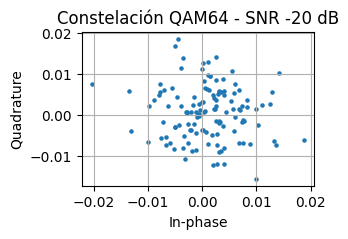

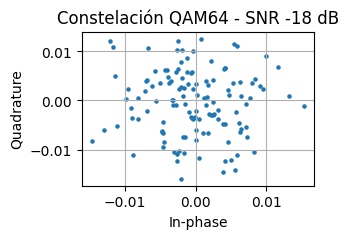

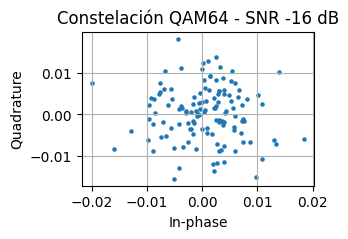

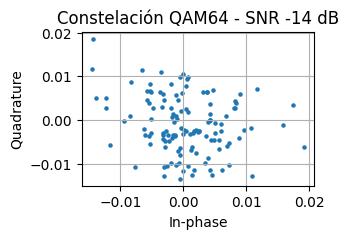

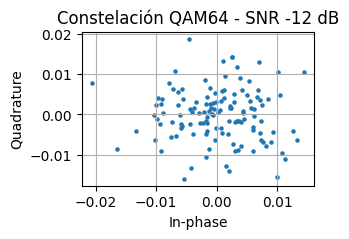

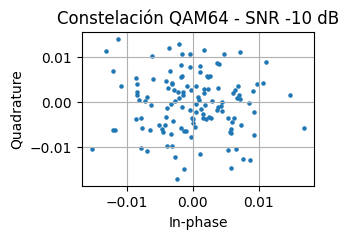

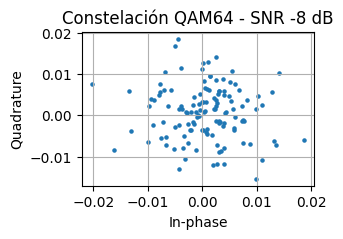

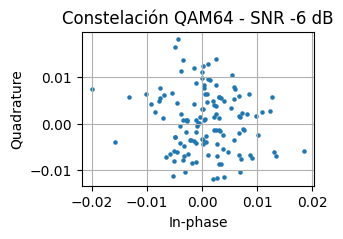

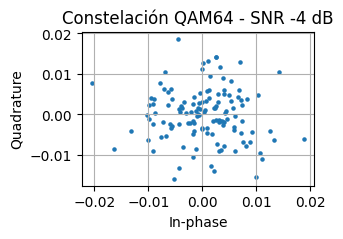

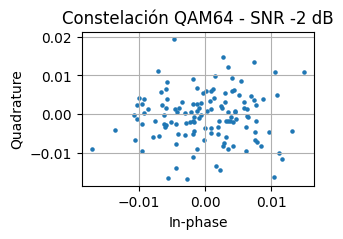

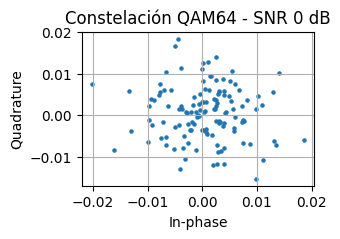

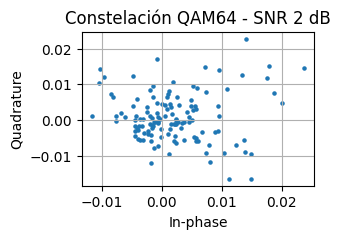

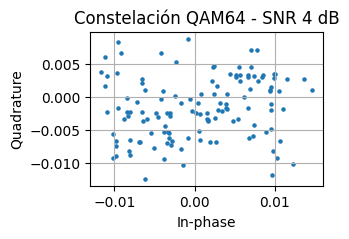

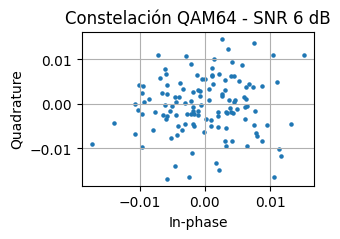

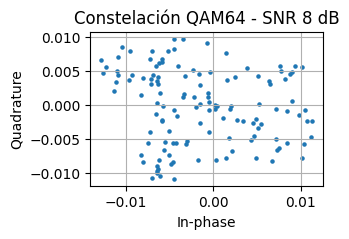

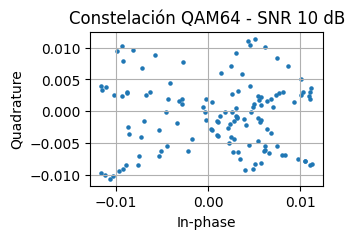

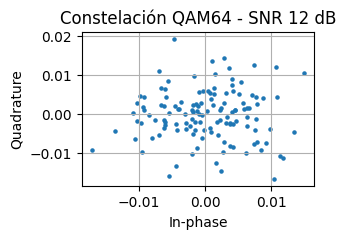

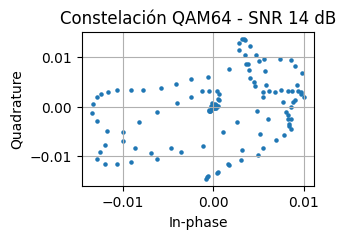

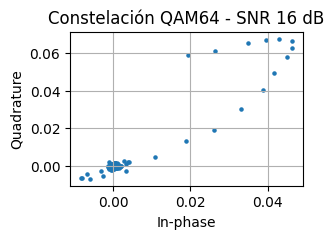

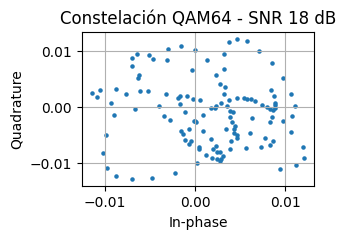

In [ ]:
# Función para graficar la constelación
def plot_constellation(signal, title):
    plt.figure(figsize=(3, 2))  # Ajustar el tamaño de la figura
    plt.scatter(signal.real, signal.imag, s=5)  # Aumentar el tamaño de los puntos
    plt.title(title)
    plt.xlabel('In-phase')
    plt.ylabel('Quadrature')
    plt.grid(True)
    plt.show()

# Definir un conjunto para almacenar los SNR ya vistos
snr_seen = set()

# Crear una lista para almacenar SNRs válidos
valid_snr = list(range(-20, 20, 2))

# Recorrer las claves del diccionario en el orden definido
for snr_db in valid_snr:
    for key, signals in data.items():
        # Verificar si la clave es de tipo QPSK y coincide con el SNR
        if key[0] == 'QAM64' and key[1] == snr_db:
            # Verificar si ya se ha graficado este SNR
            if snr_db not in snr_seen:
                snr_seen.add(snr_db)

                for example_signal in signals:
                    # Convertir la señal a formato complejo (suponiendo que las señales son reales y están en pares [I, Q])
                    complex_signal = example_signal[0::2] + 1j * example_signal[1::2]

                    # Graficar la constelación
                    plot_constellation(complex_signal, f'Constelación QAM64 - SNR {snr_db} dB')

                    # Salir del bucle después de graficar una señal por cada SNR
                    break

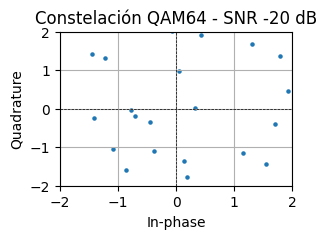

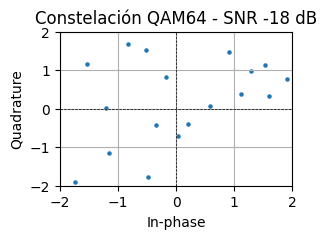

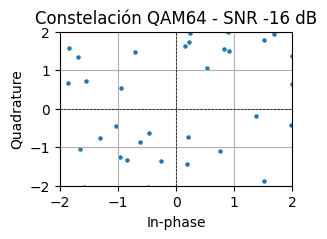

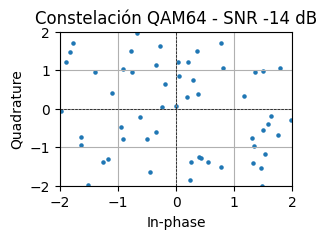

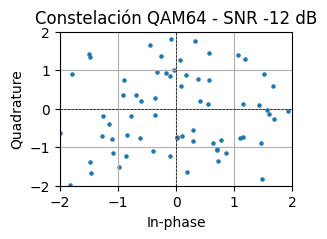

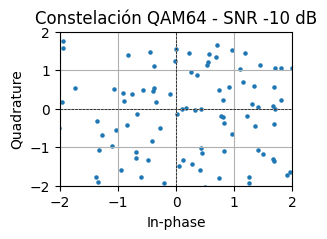

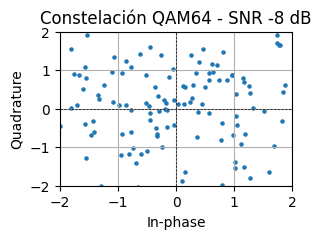

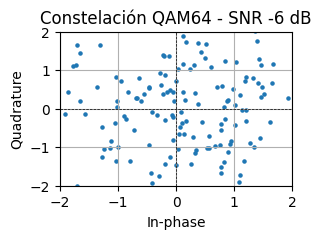

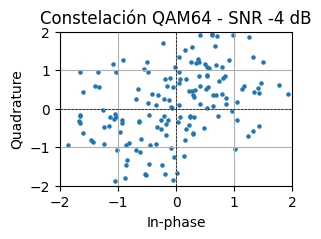

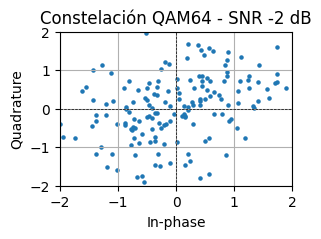

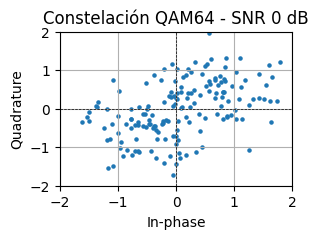

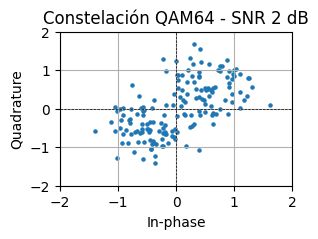

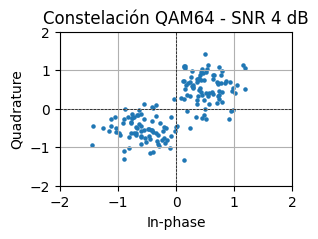

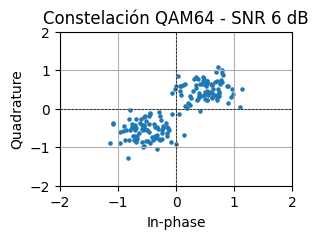

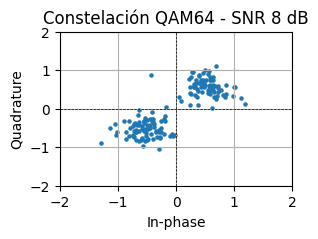

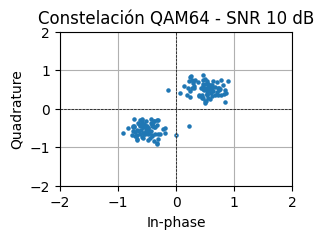

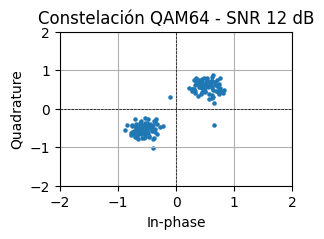

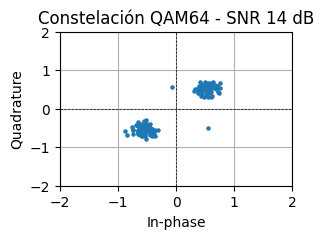

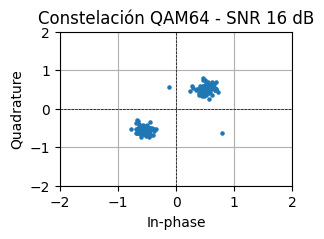

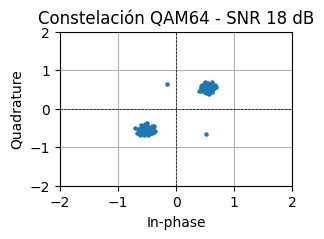

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para generar una onda senoidal
def generate_sine_wave(freq, duration, sample_rate):
    t = np.arange(0, duration, 1/sample_rate)
    return np.sin(2 * np.pi * freq * t)

# Función para mapear bits a símbolos QAM64
def qam64_modulate(bits):
    if len(bits) % 6 != 0:
        bits = bits[:-(len(bits) % 6)]

    symbols = []
    for i in range(0, len(bits), 6):
        b0, b1, b2, b3, b4, b5 = bits[i:i+6]
        real = (4 * b0 + 2 * b1 + b2 - 3.5) / np.sqrt(42)
        imag = (4 * b3 + 2 * b4 + b5 - 3.5) / np.sqrt(42)
        symbol = real + 1j * imag
        symbols.append(symbol)
    return np.array(symbols)

# Función para añadir ruido a la señal
def add_noise(signal, snr_db):
    snr_linear = 10**(snr_db / 10)
    power_signal = np.mean(np.abs(signal)**2)
    power_noise = power_signal / snr_linear
    noise = np.sqrt(power_noise / 2) * (np.random.randn(len(signal)) + 1j * np.random.randn(len(signal)))
    return signal + noise

# Función para graficar la constelación
def plot_constellation(signal, title):
    plt.figure(figsize=(3, 2))  # Ajustar el tamaño de la figura
    plt.scatter(signal.real, signal.imag, s=5)  # Aumentar el tamaño de los puntos
    plt.title(title)
    plt.xlabel('In-phase')
    plt.ylabel('Quadrature')
    plt.grid(True)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.axvline(0, color='black', lw=0.5, ls='--')
    plt.show()

# Parámetros de la señal
freq = 1  # Frecuencia de la señal senoidal
duration = 1  # Duración de la señal en segundos
sample_rate = 1000  # Tasa de muestreo

# Generar la onda senoidal
sine_wave = generate_sine_wave(freq, duration, sample_rate)

# Convertir la onda senoidal en bits (por simplicidad, usaremos una representación simple)
threshold = 0  # Umbral para binarizar
bits = (sine_wave > threshold).astype(int)  # Binarizar la onda senoidal

# Definir SNRs válidos
valid_snr = list(range(-20, 20, 2))

# Recorrer los SNRs y graficar la constelación
for snr_db in valid_snr:
    # Modulación QAM64
    qam64_signal = qam64_modulate(bits)

    # Añadir ruido a la señal QAM64
    noisy_signal = add_noise(qam64_signal, snr_db)

    # Graficar la constelación
    plot_constellation(noisy_signal, f'Constelación QAM64 - SNR {snr_db} dB')
